<a href="https://colab.research.google.com/github/OmG001/Stock-pred/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


Getting Companies Data

In [ ]:

# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'NVDA', 'F']

# Set up End and Start times for data grab
tech_list = ['TSLA', 'NVDA', 'F']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [TSLA, NVDA, F,]
company_name = ["Tesla", "NVIDIA", "Ford Motor"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-03,15.15,15.40,15.15,15.24,15.24,29412700,Ford Motor
2023-07-05,15.21,15.42,15.12,15.35,15.35,52003900,Ford Motor
2023-07-06,15.17,15.25,14.88,14.98,14.98,64841400,Ford Motor
2023-07-07,14.99,15.24,14.94,14.98,14.98,53344500,Ford Motor
2023-07-10,14.96,15.09,14.83,15.07,15.07,51882000,Ford Motor
2023-07-11,15.07,15.25,14.97,15.23,15.23,45849700,Ford Motor
2023-07-12,15.37,15.42,15.20,15.22,15.22,47636800,Ford Motor
2023-07-13,15.27,15.28,15.08,15.19,15.19,49664300,Ford Motor
2023-07-14,15.23,15.27,14.91,14.98,14.98,48720800,Ford Motor


Descriptive statistics of a company's Data

In [ ]:
# companay for analysing
companyName= TSLA
companyName.describe()


,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,242.000000,232.000000,202.000000,250.000000
mean,212.832005,217.544674,207.870571,212.826003,212.826003,1.237990e+08,210.798081,207.987749,199.650774,0.001476
std,53.191554,53.808523,52.629266,53.186579,53.186579,4.941222e+07,51.964382,49.606431,39.643119,0.038010
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07,115.056998,121.334000,150.403800,-0.122422
25%,176.635002,182.419998,172.504997,178.474998,178.474998,8.446815e+07,178.532748,174.937249,174.967950,-0.020107
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.197280e+08,196.394501,192.702250,188.075300,0.002087
75%,260.385010,266.154999,256.736664,261.154999,261.154999,1.591312e+08,258.054750,245.984625,218.677299,0.022631
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08,301.380002,297.646835,290.086001,0.110002


Information of a company's Data

In [ ]:
companyName.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-18 to 2023-07-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


Closing prices of all companies

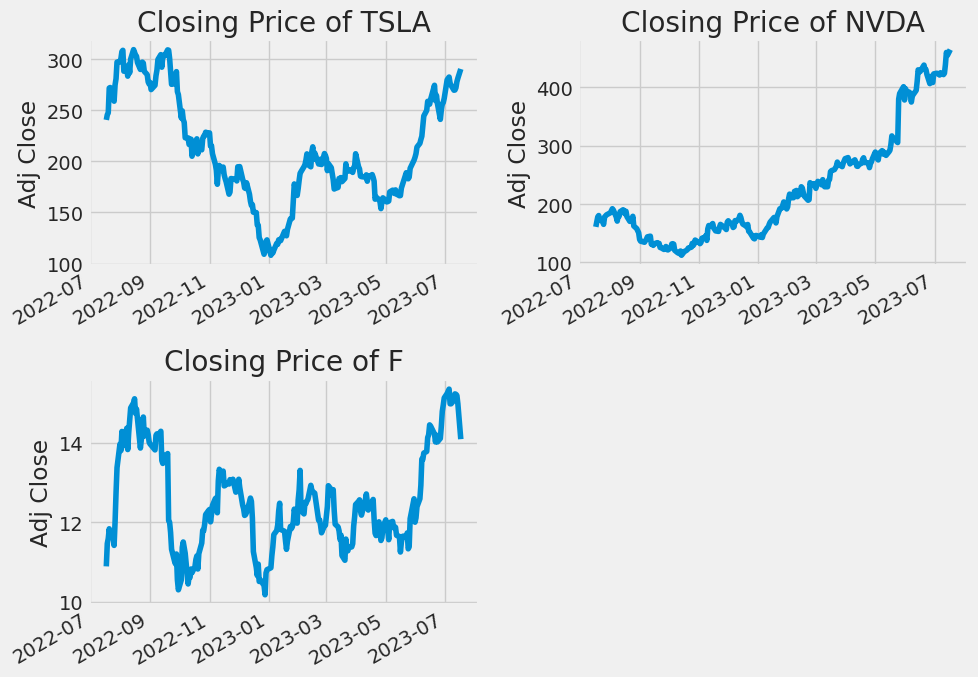

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Analysing Moving Average of Different Companies

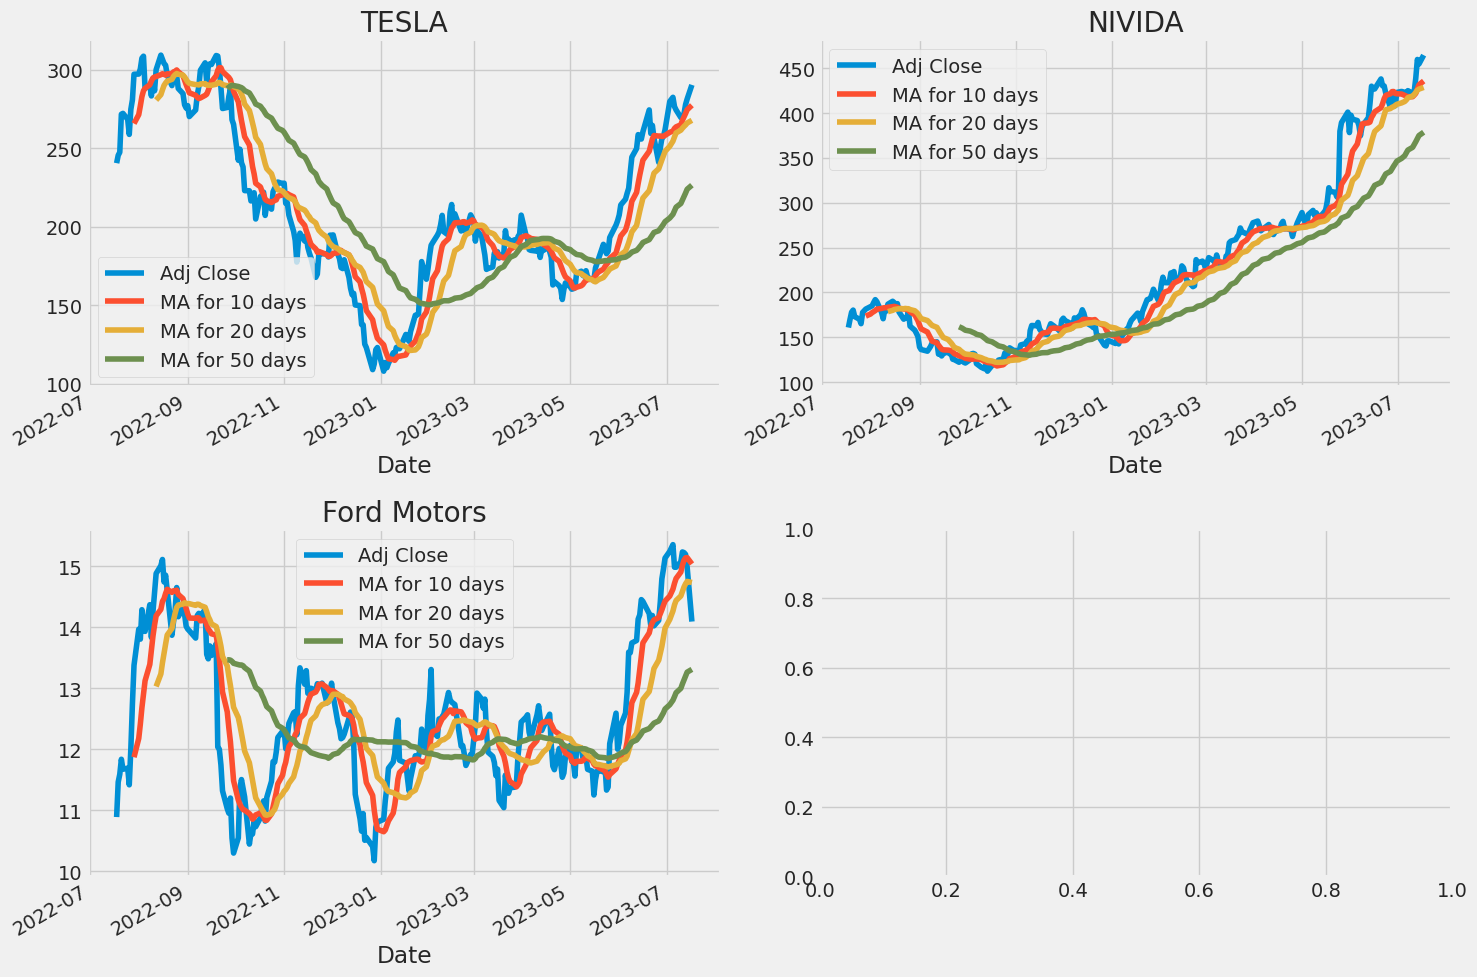

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NIVIDA')

F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Ford Motors')

fig.tight_layout()

Daily return from Companies

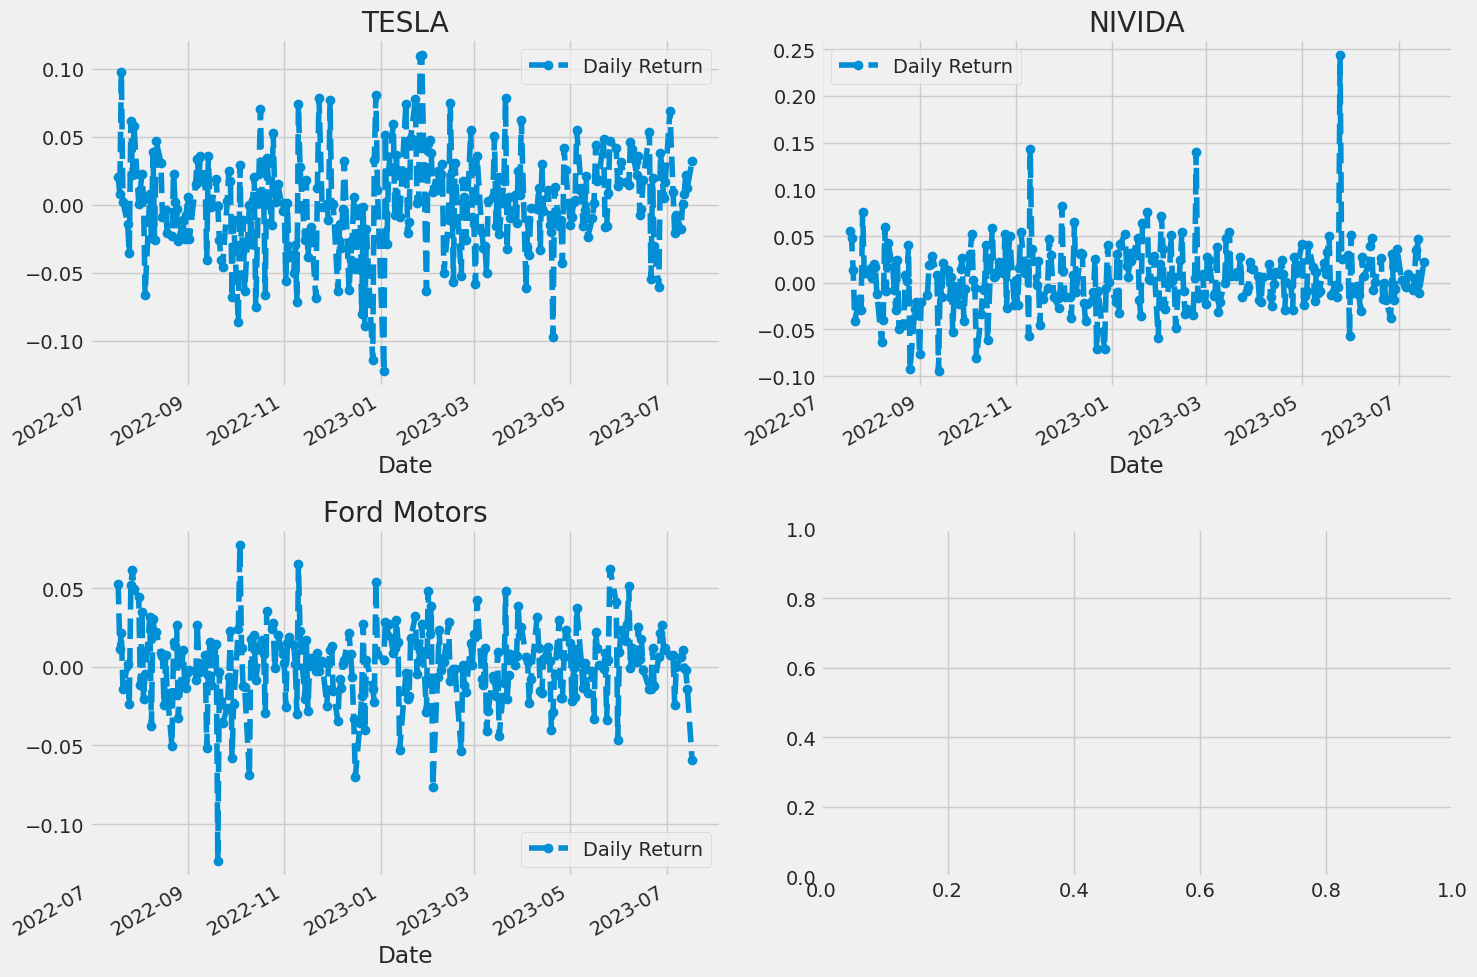

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NIVIDA')

F['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Ford Motors')

fig.tight_layout()

Finding correlation between different stock closing prices.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  3 of 3 completed


,F,NVDA,TSLA
Date,,,
2022-07-18,NaN,NaN,NaN
2022-07-19,0.052676,0.055338,0.020717
2022-07-20,0.011120,0.047964,0.008023
2022-07-21,0.021210,0.013646,0.097805
2022-07-22,-0.013846,-0.040498,0.001975


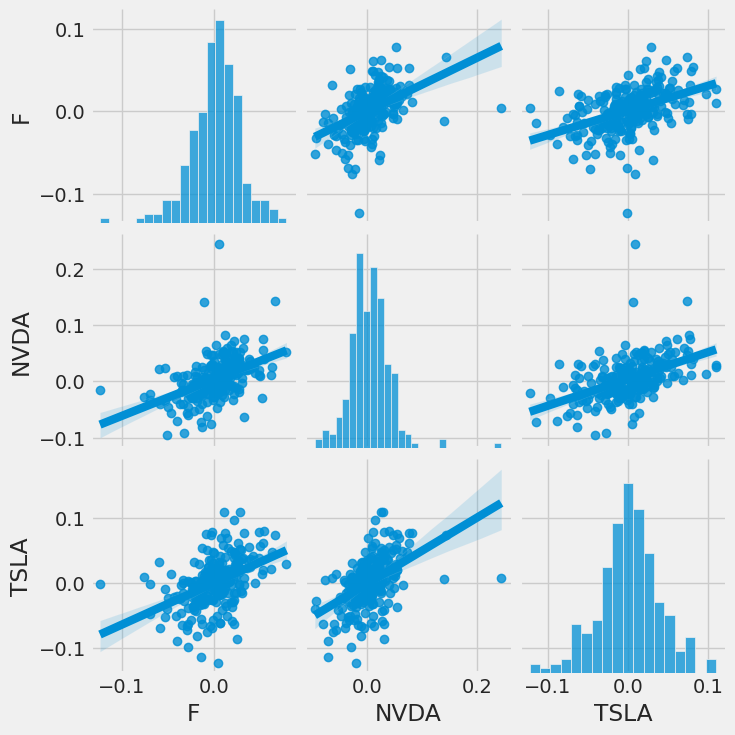

In [ ]:
# automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

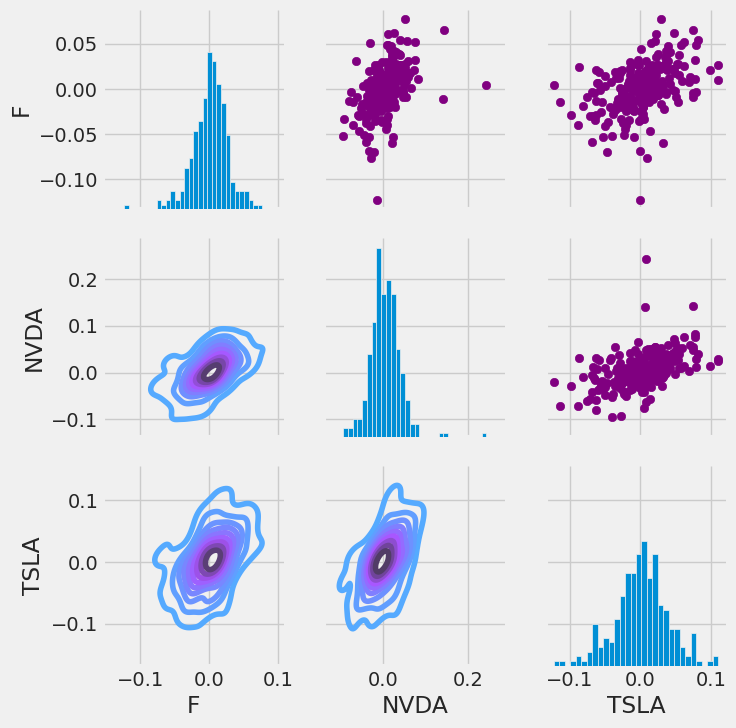

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

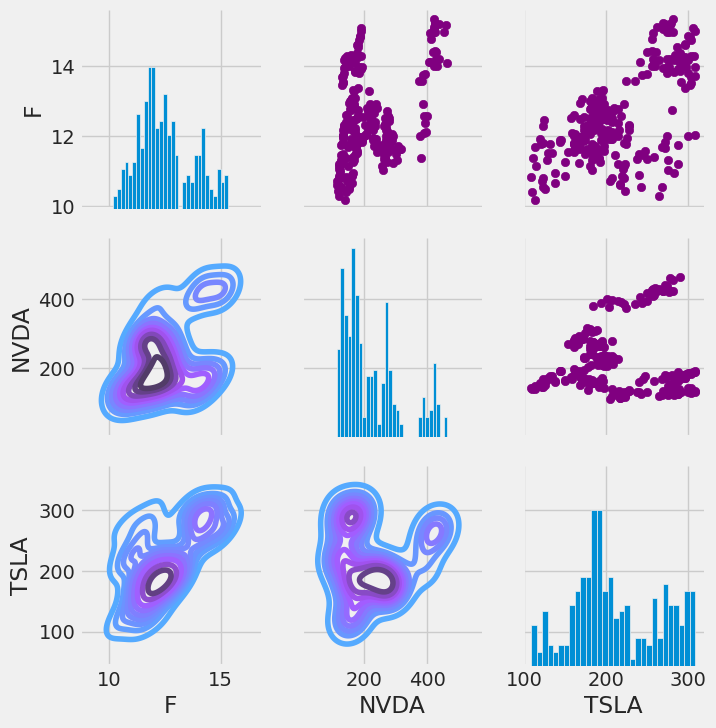

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

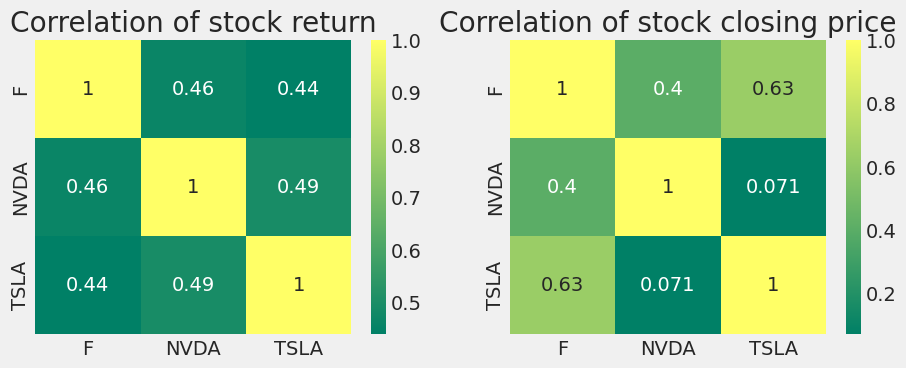

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

How much value do we put at risk by investing in a particular stock?

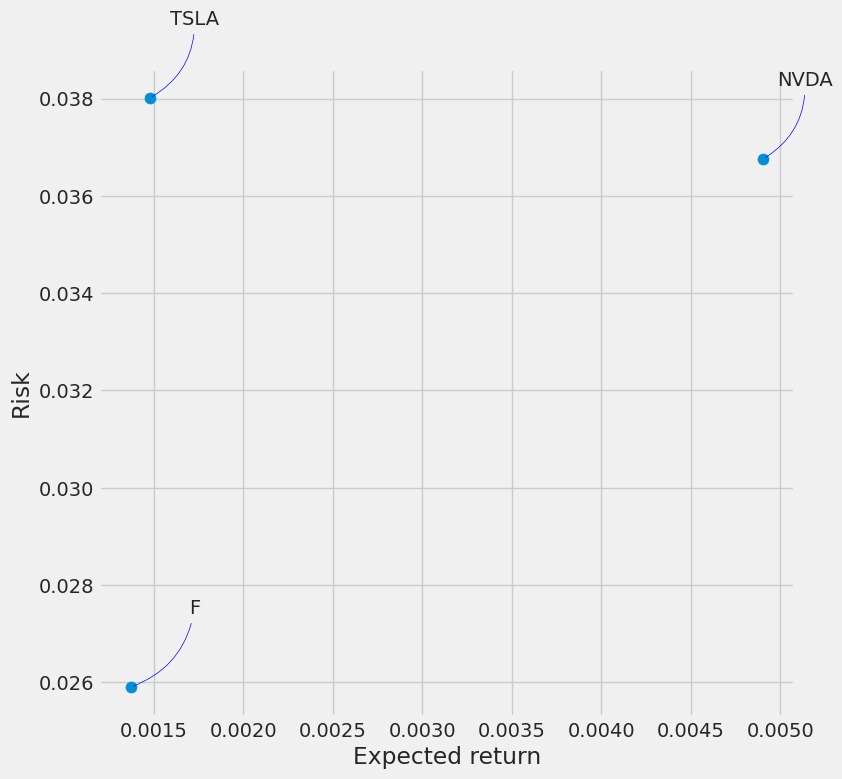

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [ ]:
# Get the stock quote
company_pred = 'TSLA'
df = pdr.get_data_yahoo( company_pred , start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100
2023-07-13,274.589996,279.450012,270.600006,277.899994,277.899994,112681500


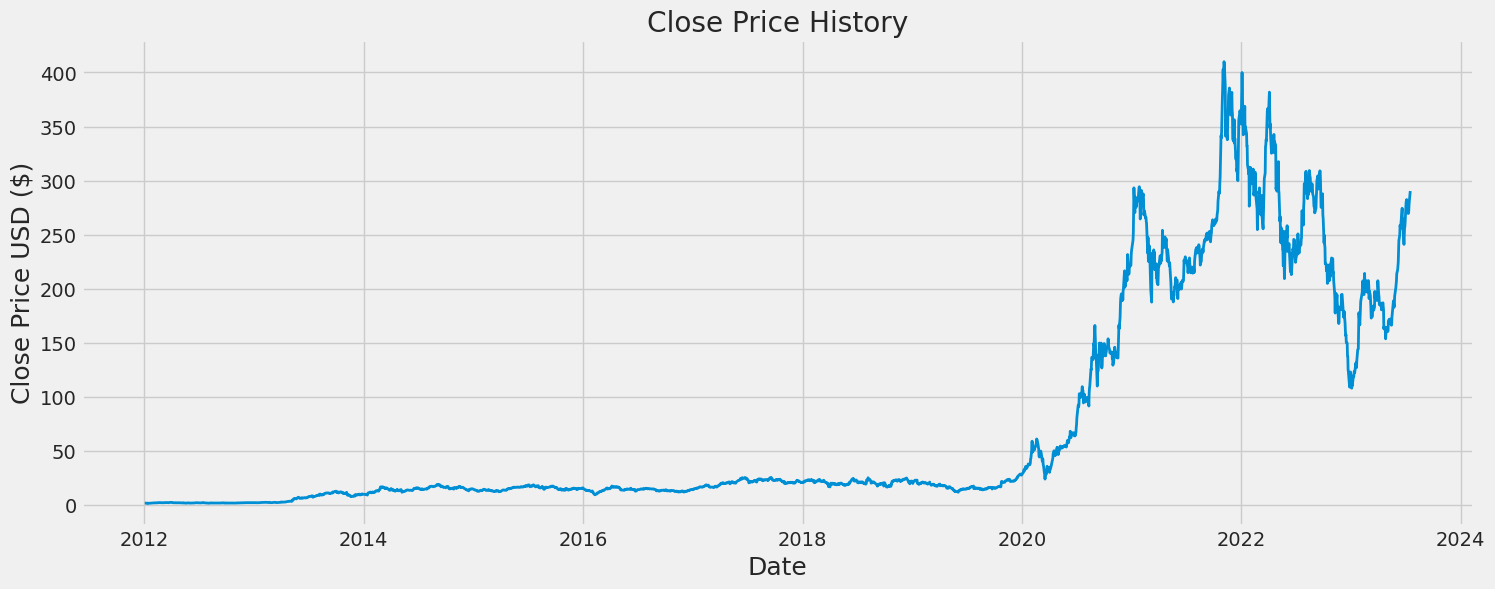

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'],linewidth = 2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2757

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.63426116e-04],
       [8.03034430e-04],
       [7.06736421e-04],
       ...,
       [6.76656160e-01],
       [6.85176188e-01],
       [7.07210673e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation ='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
85/85 [==============================] - 16s 137ms/step - loss: 0.0045
Epoch 2/10
85/85 [==============================] - 12s 141ms/step - loss: 8.8820e-04
Epoch 3/10
85/85 [==============================] - 12s 138ms/step - loss: 6.0414e-04
Epoch 4/10
85/85 [==============================] - 12s 137ms/step - loss: 5.4153e-04
Epoch 5/10
85/85 [==============================] - 11s 135ms/step - loss: 4.9330e-04
Epoch 6/10
85/85 [==============================] - 11s 124ms/step - loss: 4.5228e-04
Epoch 7/10
85/85 [==============================] - 12s 134ms/step - loss: 4.5650e-04
Epoch 8/10
85/85 [==============================] - 12s 137ms/step - loss: 4.0870e-04
Epoch 9/10
85/85 [==============================] - 12s 138ms/step - loss: 3.5369e-04
Epoch 10/10
85/85 [==============================] - 12s 138ms/step - loss: 3.9985e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 37ms/step


12.551520281693653

<ipython-input-91-f5cbe2387376>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


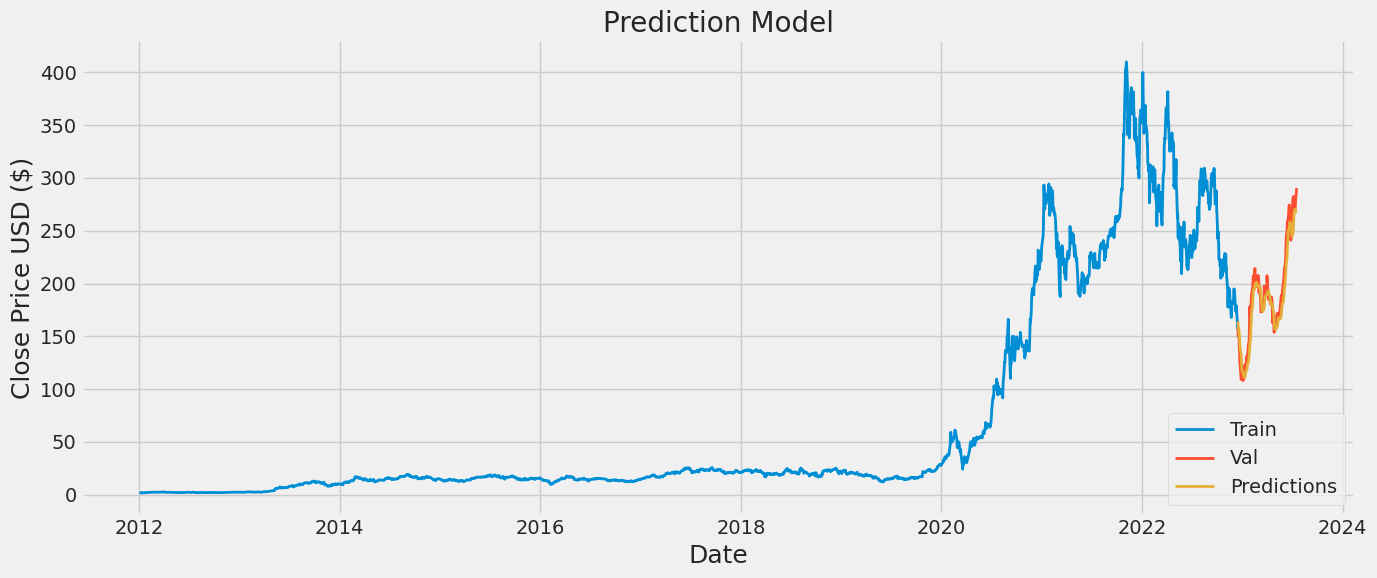

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth = 2)
plt.plot(valid[['Close', 'Predictions']], linewidth = 2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.tight_layout()

In [ ]:
# Show the valid and predicted prices
valid